<a href="https://colab.research.google.com/github/Abdullah-Tanweer/DEVELOPERS-HUB-AI-INTERNSHIP/blob/main/TASK_3_INTERNSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3: Heart Disease Prediction
Objective:
Build a model to predict whether a person is at risk of heart disease based on their health data.
Dataset:
Heart Disease UCI Dataset (available on Kaggle)
Instructions:
● Clean the dataset (handle missing values if any).
● Perform Exploratory Data Analysis (EDA) to understand trends.
● Train a classification model (Logistic Regression or Decision Tree).
● Evaluate using metrics: accuracy, ROC curve, and confusion matrix.
● Highlight important features affecting prediction.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


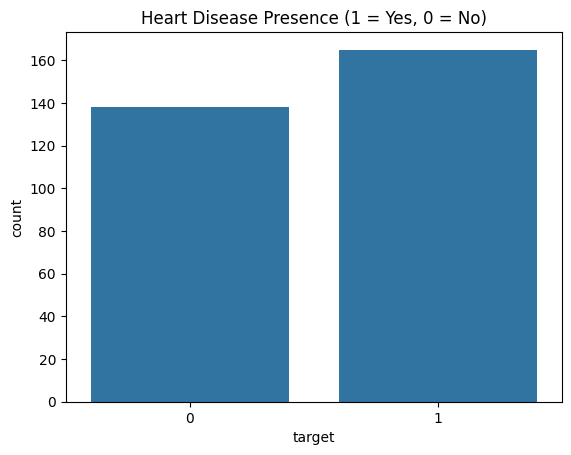

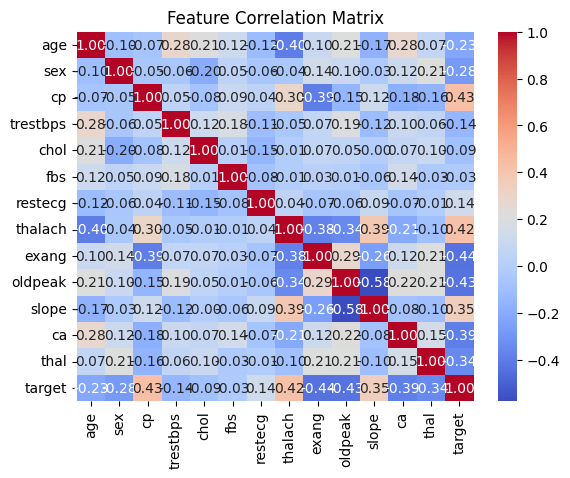

Accuracy: 0.85


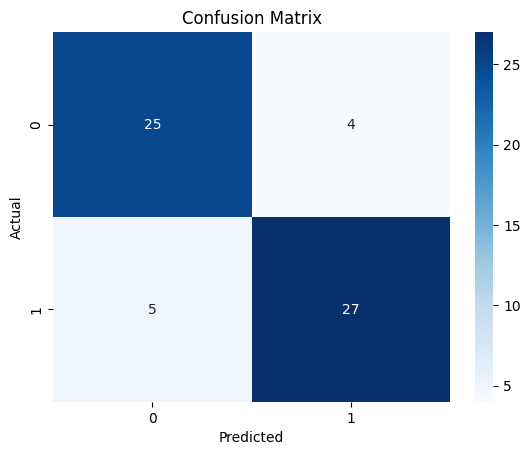

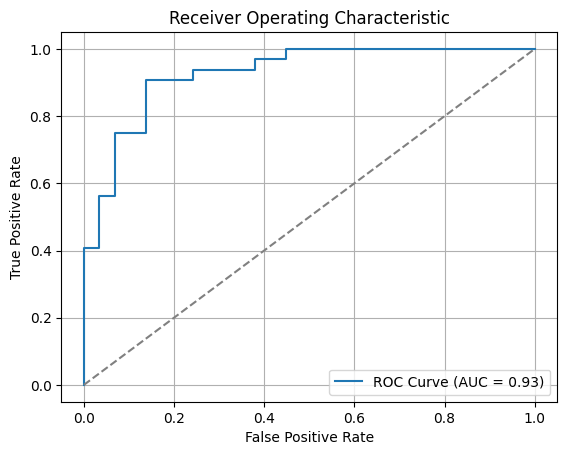

Top Features Influencing Prediction:
 cp          0.824407
ca         -0.813470
sex        -0.768878
oldpeak    -0.712311
thal       -0.581088
exang      -0.523150
slope       0.442825
thalach     0.403597
trestbps   -0.284040
restecg     0.280884
dtype: float64


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Step 2: Load Dataset
df = pd.read_csv('/content/heart.csv')  # Make sure the heart.csv is in your working directory

# Step 3: Check for Missing Values
print(df.isnull().sum())

# Step 4: Exploratory Data Analysis (EDA)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence (1 = Yes, 0 = No)')
plt.show()

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Step 5: Feature Selection & Scaling
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train Model (Logistic Regression)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Step 8: Evaluate Model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_probs = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Feature Importance
coefficients = pd.Series(lr_model.coef_[0], index=X.columns)
important_features = coefficients.sort_values(key=abs, ascending=False)
print("Top Features Influencing Prediction:\n", important_features.head(10))
